### Problem 01 - Salary
classify the Size_Categorie using SVM

#### 1. Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold,cross_val_score, LeaveOneOut
from IPython.display import Image
from IPython.core.display import HTML
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

####  2. Importing the Data

In [2]:
data_1_train = pd.read_csv('SalaryData_Train.csv')
data_1_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data_1_test = pd.read_csv('SalaryData_Test.csv')
data_1_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


####  3. Data Understanding

In [4]:
data_1_train.dtypes, data_1_test.dtypes

(age               int64
 workclass        object
 education        object
 educationno       int64
 maritalstatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalgain       int64
 capitalloss       int64
 hoursperweek      int64
 native           object
 Salary           object
 dtype: object,
 age               int64
 workclass        object
 education        object
 educationno       int64
 maritalstatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalgain       int64
 capitalloss       int64
 hoursperweek      int64
 native           object
 Salary           object
 dtype: object)

In [5]:
data_1_train.isnull().sum(), data_1_test.isnull().sum()

(age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64,
 age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64)

In [6]:
data_1_train.shape, data_1_test.shape

((30161, 14), (15060, 14))

In [7]:
data_1_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data_1_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [9]:
data_1_train['Salary'].value_counts(),data_1_test['Salary'].value_counts() 

( <=50K    22653
  >50K      7508
 Name: Salary, dtype: int64,
  <=50K    11360
  >50K      3700
 Name: Salary, dtype: int64)

In [10]:
22653/7508

3.017181672882259

In [11]:
11360/3700

3.0702702702702704

In [12]:
# data given for Test and Train are highly unbalanced.
## from now we will use only training data to build the model.
### data is imbalanced in approx 3 : 1 ratio

#### 4. Data Preparation

In [13]:
data_1_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
# SVM is non parametric thus we will use lable encoder

In [15]:
labelencoder = LabelEncoder()

In [16]:
data_1_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [17]:
data_1_train['education'].value_counts(), data_1_train['educationno'].value_counts()

( HS-grad         9840
  Some-college    6677
  Bachelors       5044
  Masters         1627
  Assoc-voc       1307
  11th            1048
  Assoc-acdm      1008
  10th             820
  7th-8th          557
  Prof-school      542
  9th              455
  12th             377
  Doctorate        375
  5th-6th          288
  1st-4th          151
  Preschool         45
 Name: education, dtype: int64,
 9     9840
 10    6677
 13    5044
 14    1627
 11    1307
 7     1048
 12    1008
 6      820
 4      557
 15     542
 5      455
 8      377
 16     375
 3      288
 2      151
 1       45
 Name: educationno, dtype: int64)

In [18]:
# Education and Education No from the columns are already encoded by label encoder
# thus we will drop education column

In [19]:
data_1_train['workclass'] = labelencoder.fit_transform(data_1_train['workclass'])

In [20]:
data_1_train['maritalstatus'] = labelencoder.fit_transform(data_1_train['maritalstatus'])

In [21]:
data_1_train['occupation'] = labelencoder.fit_transform(data_1_train['occupation'])

In [22]:
data_1_train['relationship'] = labelencoder.fit_transform(data_1_train['relationship'])

In [23]:
data_1_train['race'] = labelencoder.fit_transform(data_1_train['race'])

In [24]:
data_1_train['sex'] = labelencoder.fit_transform(data_1_train['sex'])

In [25]:
data_1_train['native'] = labelencoder.fit_transform(data_1_train['native'])

In [26]:
data_1_train['Salary'] = labelencoder.fit_transform(data_1_train['Salary'])

In [27]:
data_1_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,Bachelors,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,Bachelors,13,2,3,0,4,1,0,0,13,37,0
2,38,2,HS-grad,9,0,5,1,4,1,0,0,40,37,0
3,53,2,11th,7,2,5,0,2,1,0,0,40,37,0
4,28,2,Bachelors,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,Assoc-acdm,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,HS-grad,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,HS-grad,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,HS-grad,9,4,0,3,4,1,0,0,20,37,0


In [28]:
X= data_1_train.drop(labels = ['Salary', 'education'], axis = 1)
y = data_1_train[['Salary']]

In [29]:
X.dtypes

age              int64
workclass        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
dtype: object

In [30]:
y.dtypes

Salary    int32
dtype: object

In [31]:
X.shape, y.shape

((30161, 12), (30161, 1))

In [46]:
X_test= data_1_test.drop(labels = ['Salary', 'education'], axis = 1)
y_test = data_1_test[['Salary']]

#### 5.Model Building

In [32]:
#data is imbalance in 3:1 ratio thus class weights are applied in 1:3 ratio

model_lin = SVC(kernel='linear', class_weight={1:3,0:1})   

model_poly = SVC(kernel='poly', class_weight={1:3,0:1})
model_rbf = SVC(kernel='rbf', class_weight={1:3,0:1})
model_sigmoid = SVC(kernel='sigmoid', class_weight={1:3,0:1})

#### 6. Model Training | 7. Model Testing

In [33]:
%%time
model_lin.fit(X, y)

Wall time: 12h 58min 8s


SVC(class_weight={0: 1, 1: 3}, kernel='linear')

In [34]:
%%time
lin_y_pred_train = model_lin.predict(X)

Wall time: 28.7 s


In [64]:
%%time
model_poly.fit(X, y)

Wall time: 1min 48s


SVC(class_weight={0: 1, 1: 3}, kernel='poly')

In [65]:
%%time
poly_y_pred_train = model_poly.predict(X)

Wall time: 55.2 s


### Test Data pre processing

In [66]:
data_1_test['workclass'] = labelencoder.fit_transform(data_1_test['workclass'])

In [67]:
data_1_test['maritalstatus'] = labelencoder.fit_transform(data_1_test['maritalstatus'])

In [68]:
data_1_test['occupation'] = labelencoder.fit_transform(data_1_test['occupation'])

In [69]:
data_1_test['relationship'] = labelencoder.fit_transform(data_1_test['relationship'])

In [70]:
data_1_test['race'] = labelencoder.fit_transform(data_1_test['race'])

In [71]:
data_1_test['sex'] = labelencoder.fit_transform(data_1_test['sex'])

In [72]:
data_1_test['native'] = labelencoder.fit_transform(data_1_test['native'])

In [73]:
data_1_test['Salary'] = labelencoder.fit_transform(data_1_test['Salary'])

In [74]:
data_1_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,11th,7,4,6,3,2,1,0,0,40,37,0
1,38,2,HS-grad,9,2,4,0,4,1,0,0,50,37,0
2,28,1,Assoc-acdm,12,2,10,0,4,1,0,0,40,37,1
3,44,2,Some-college,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,10th,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,Bachelors,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,Bachelors,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,Bachelors,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,Bachelors,13,0,0,3,1,1,5455,0,40,37,0


In [75]:
X_test= data_1_test.drop(labels = ['Salary', 'education'], axis = 1)
y_test = data_1_test[['Salary']]

In [76]:
lin_y_pred_test = model_lin.predict(X_test)

In [77]:
poly_y_pred_test = model_poly.predict(X_test)

#### 8. Model Evaluation

In [38]:
# linear

In [78]:
print(accuracy_score(y, lin_y_pred_train))
print(accuracy_score(y_test, lin_y_pred_test))

0.7615795232253573
0.7513944223107569


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26299a71f70>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x26299a719d0>)

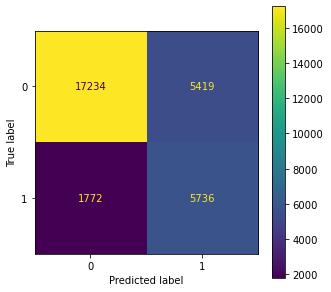

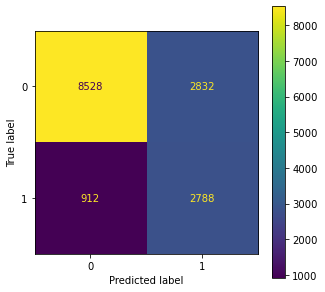

In [80]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model_lin,X,y, ax = ax), plot_confusion_matrix(model_lin,X_test,y_test, ax = bx)

In [81]:
# poly

In [82]:
print(accuracy_score(y, poly_y_pred_train))
print(accuracy_score(y_test, poly_y_pred_test))

0.795431185968635
0.7972111553784861


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x262a9c0a8b0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x262a9bd7730>)

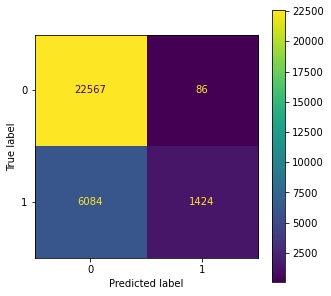

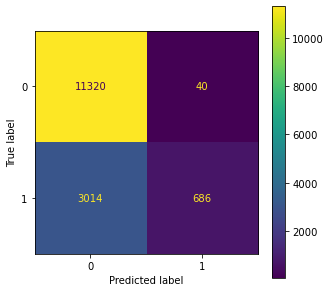

In [83]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model_poly,X,y, ax = ax), plot_confusion_matrix(model_poly,X_test,y_test, ax = bx)

### Due to very big dataset it took more than 3 hr to train the model